#Data Exploration

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB

### Import Data

In [3]:
df = pd.read_csv('./Data/health_data.csv')
#https://www.kaggle.com/datasets/prosperchuks/health-dataset
#https://www.kaggle.com/code/majinx/stroke-prediction-multiple-models-classification

In [4]:
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,0,1,0
1,12,1,1,1,26,1,0,0,1,0,0,3,0,0,0,0,1,1
2,13,1,0,1,26,0,0,1,1,1,0,1,0,10,0,0,0,0
3,11,1,1,1,28,1,0,1,1,1,0,3,0,3,0,0,1,0
4,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6,0,1,1,37,0,0,0,0,1,0,4,0,0,0,1,0,0
70688,10,1,1,1,29,1,1,0,1,1,0,2,0,0,1,1,0,0
70689,13,0,1,1,25,0,1,0,1,0,0,5,15,0,1,1,1,0
70690,11,0,1,1,18,0,0,0,0,0,0,4,0,0,1,1,1,0


### Data Cleaning and checking

In [5]:
# We will focus only on stroke prediction in this data
df = df.drop(columns=['Diabetes', 'Hypertension'])

In [6]:
# Explore columns to see what there values are
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,70692.0,8.584055,2.852153,1.0,7.0,9.0,11.0,13.0
Sex,70692.0,0.456997,0.498151,0.0,0.0,0.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0
Veggies,70692.0,0.788774,0.408181,0.0,1.0,1.0,1.0,1.0


In [7]:
# Inspect for missing values
df.isnull().sum()

# It appears we do not have any missing values in this dataset which is unusual but will take it!

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
dtype: int64

### Exploratory Data Analysis

### Plotting data to see features 

The data is discretized into a range of different binned variables, Age is broken down into 13 ranges and alot of variables have been label encoded into 1 & 0. We need to explore the variables to get an appreciation of which variables we should use in modelling later on.

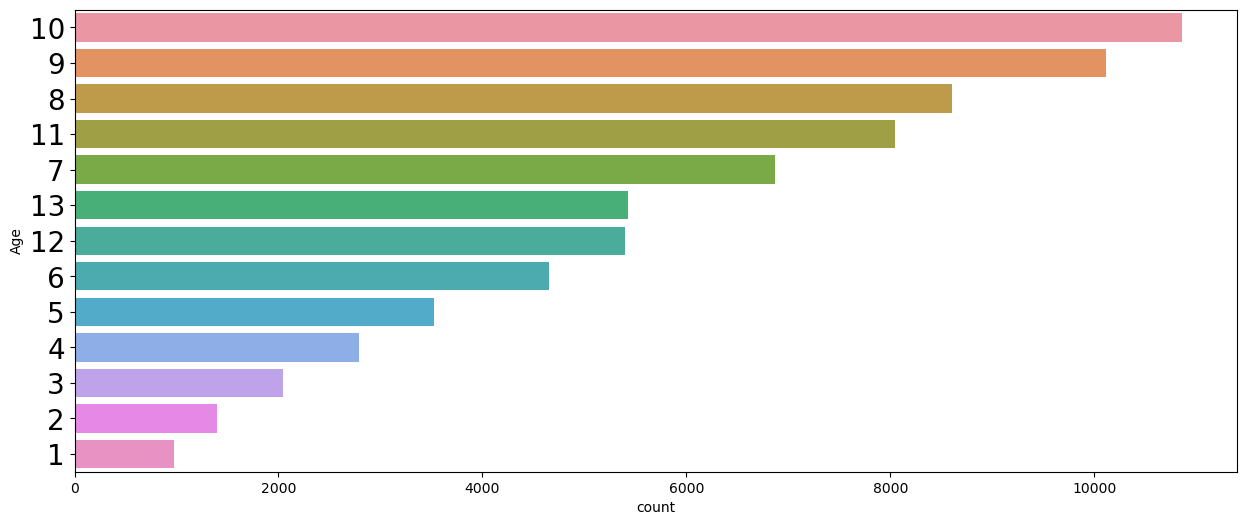

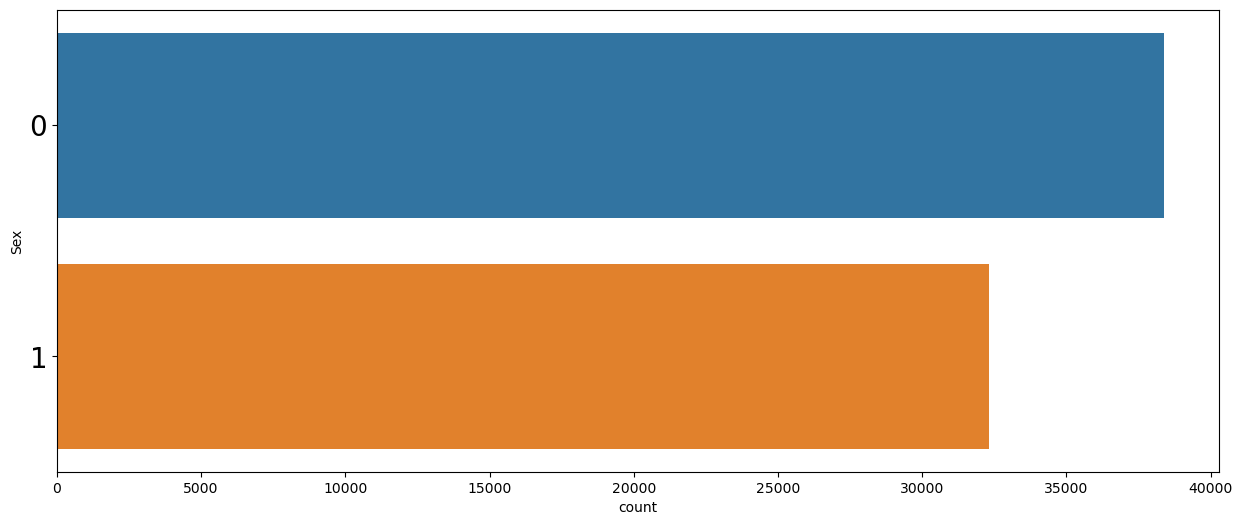

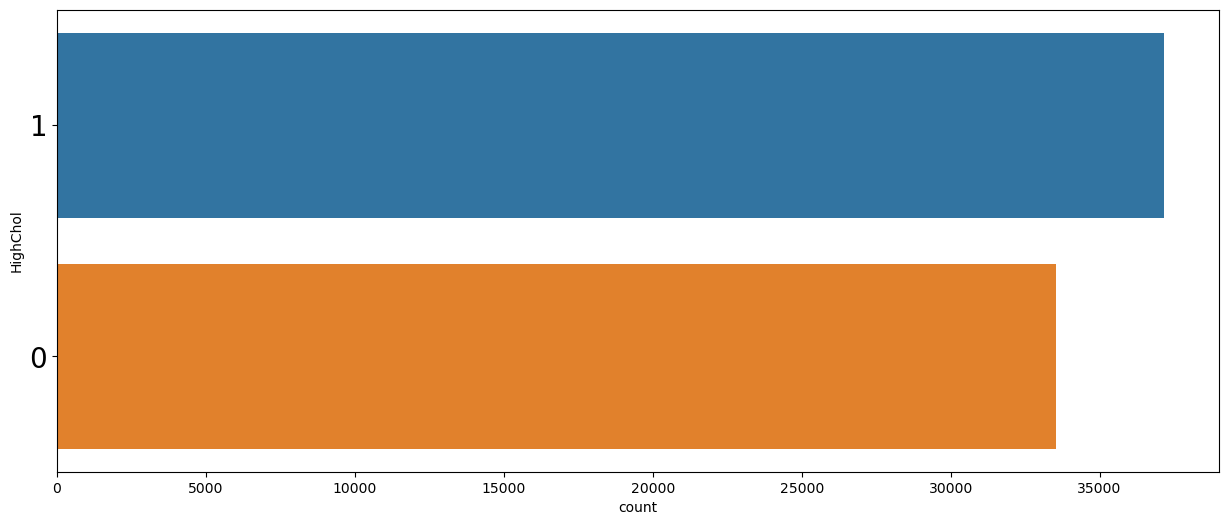

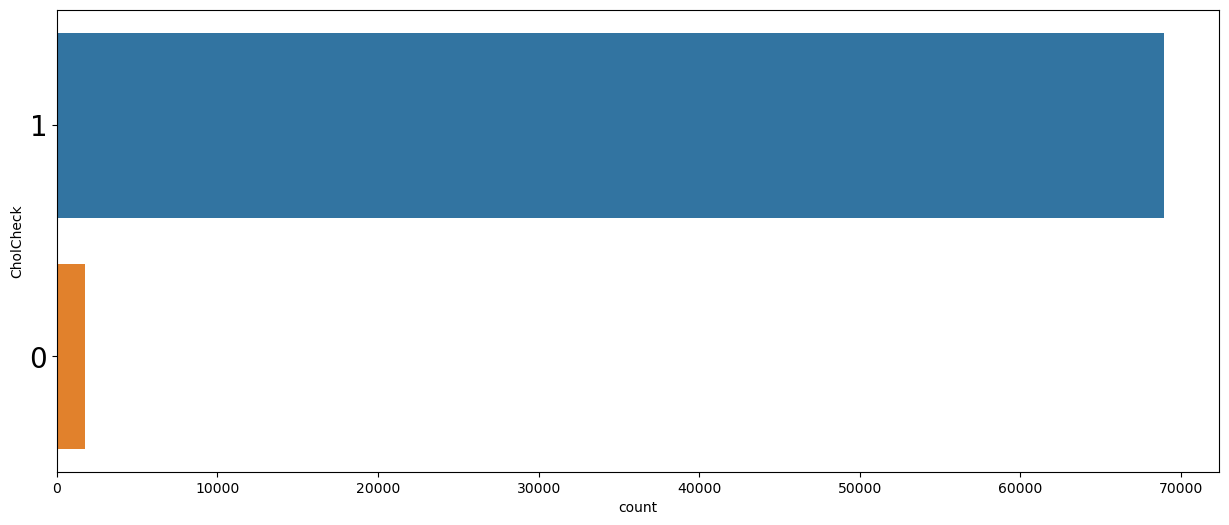

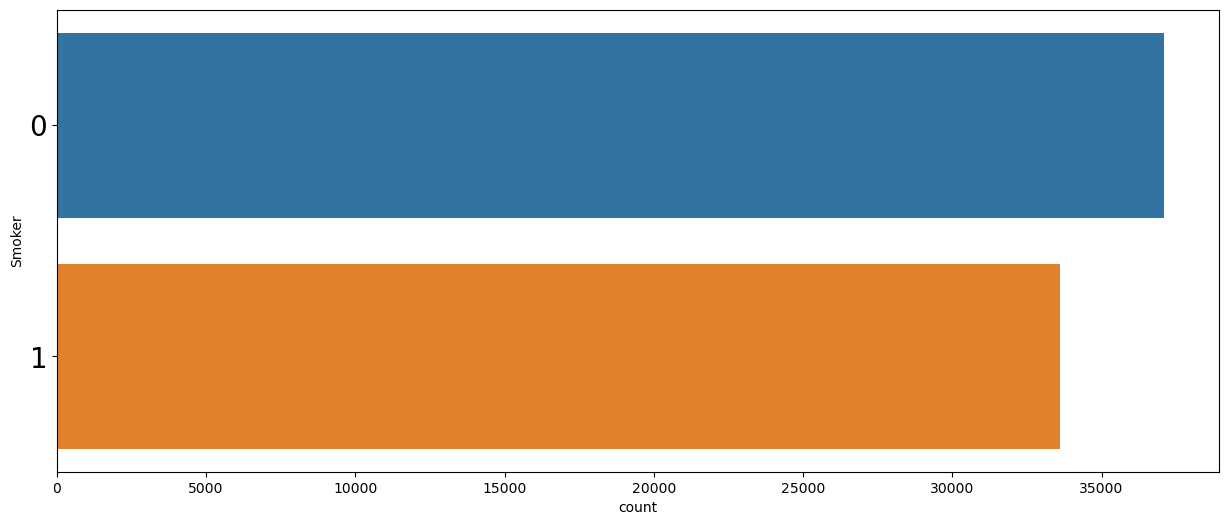

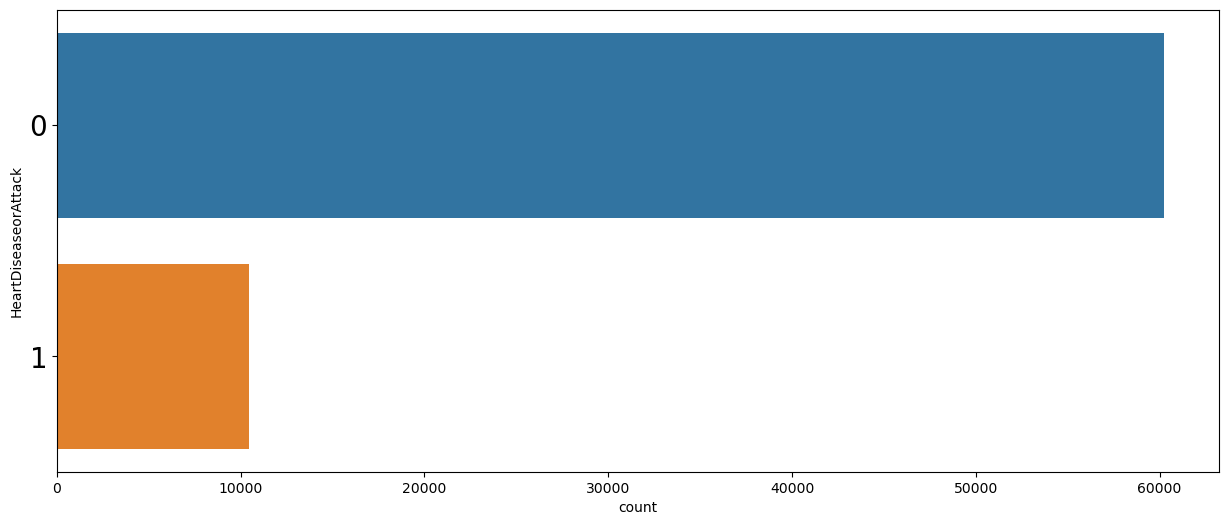

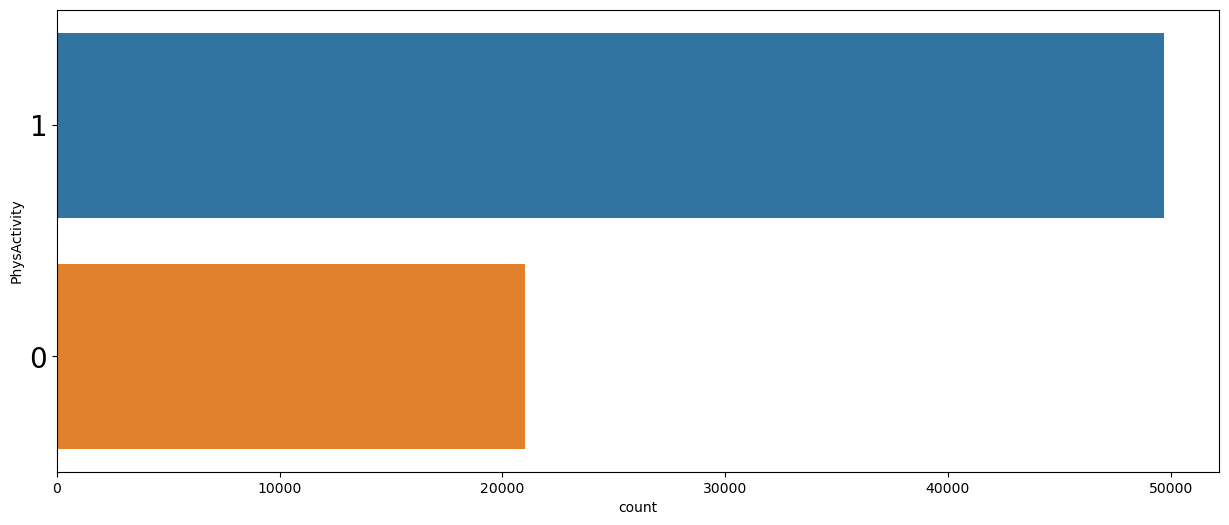

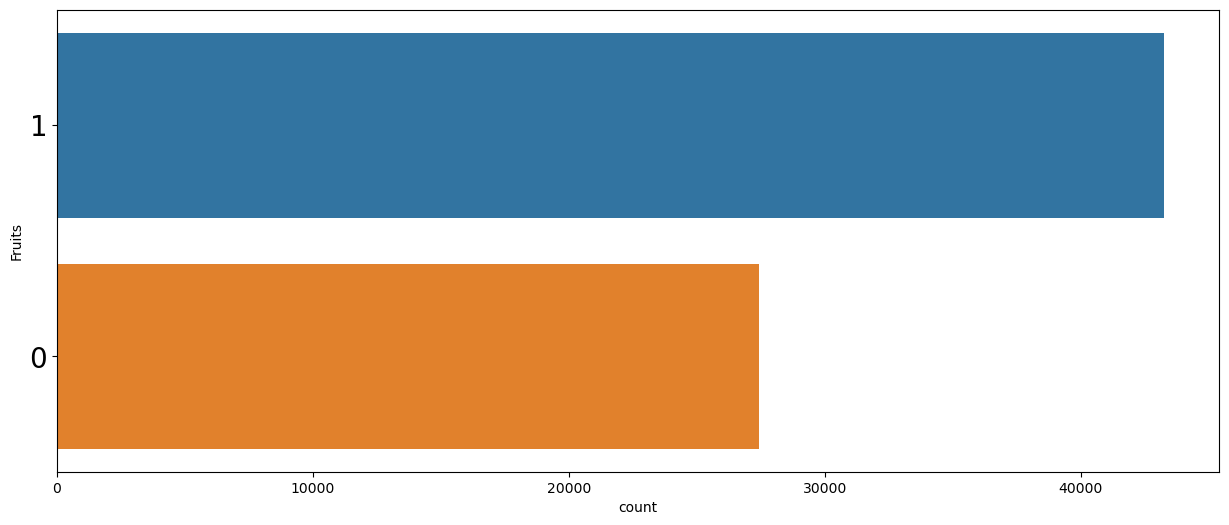

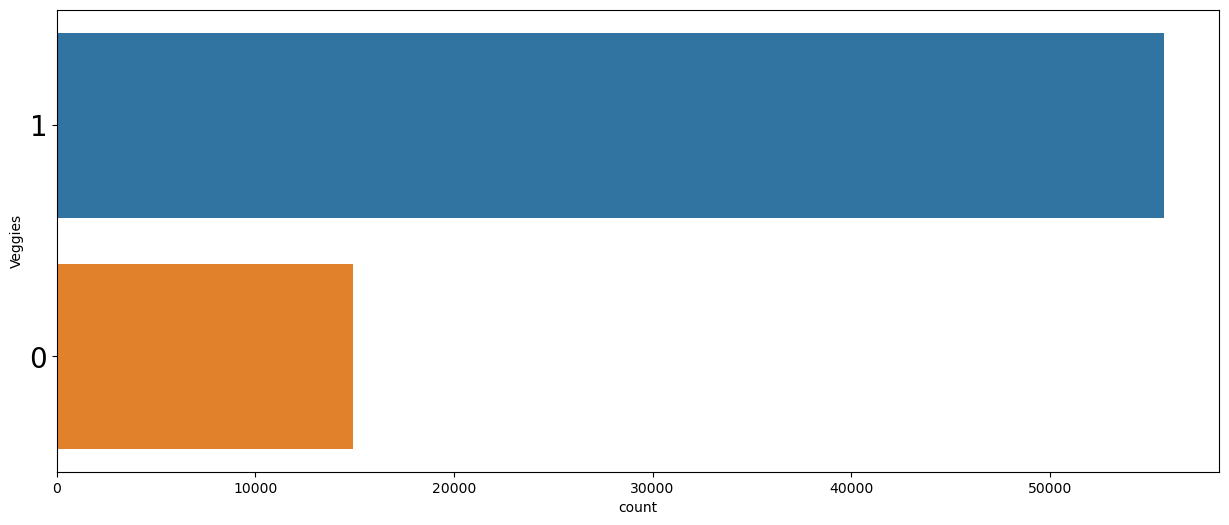

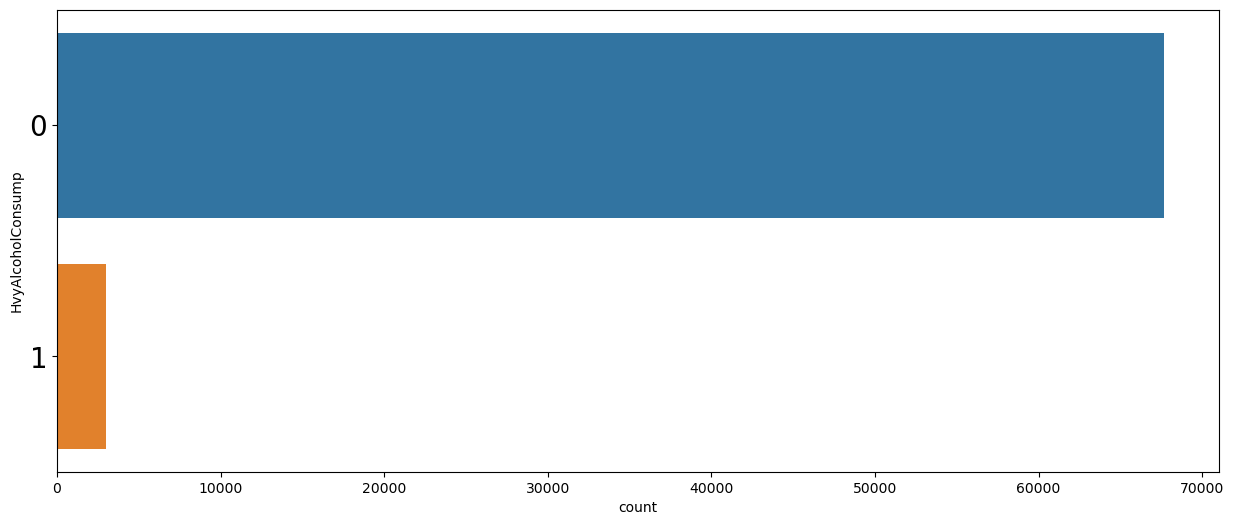

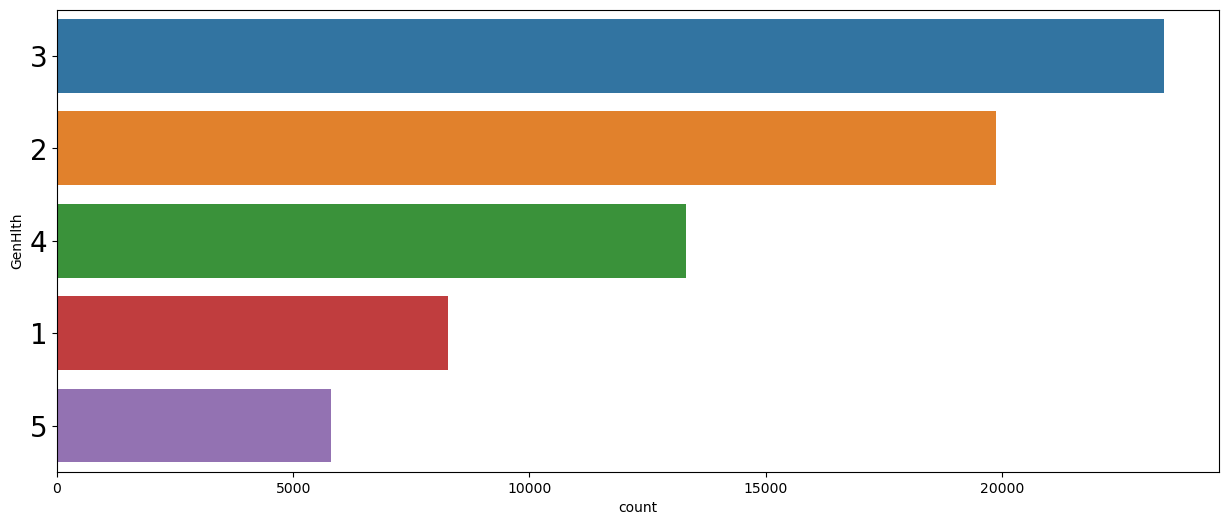

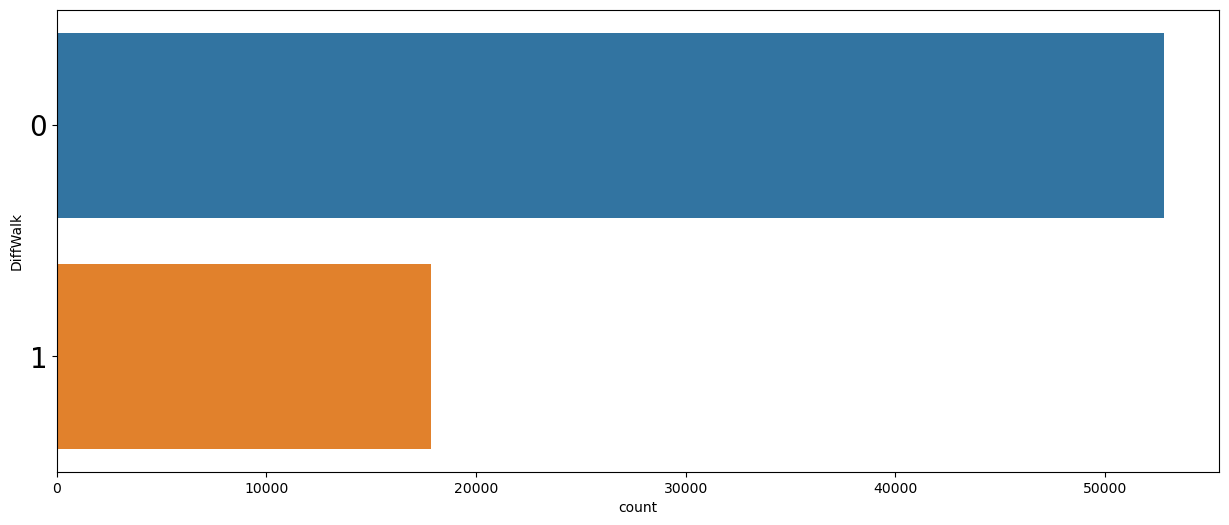

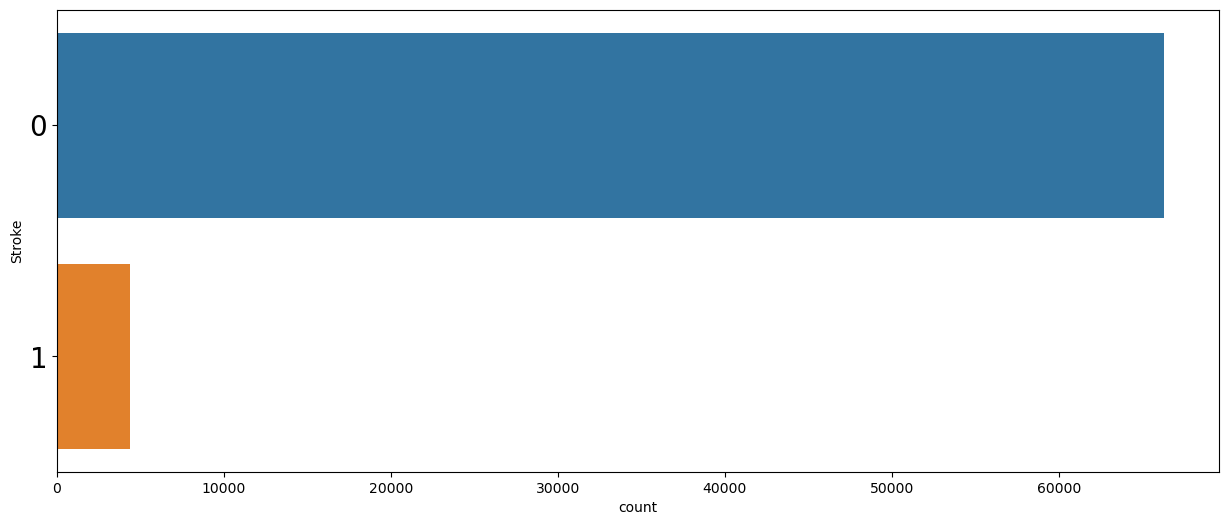

In [8]:
# columns we will plot
cols=['Age', 'Sex', 'HighChol', 'CholCheck', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'DiffWalk',
       'Stroke']

for i in cols:
  fig, ax = plt.subplots(1,1, figsize=(15, 6))
  sns.countplot(y = df[i],data=df, order=df[i].value_counts().index)
  plt.ylabel(i)
  plt.yticks(fontsize=20)
  plt.show()

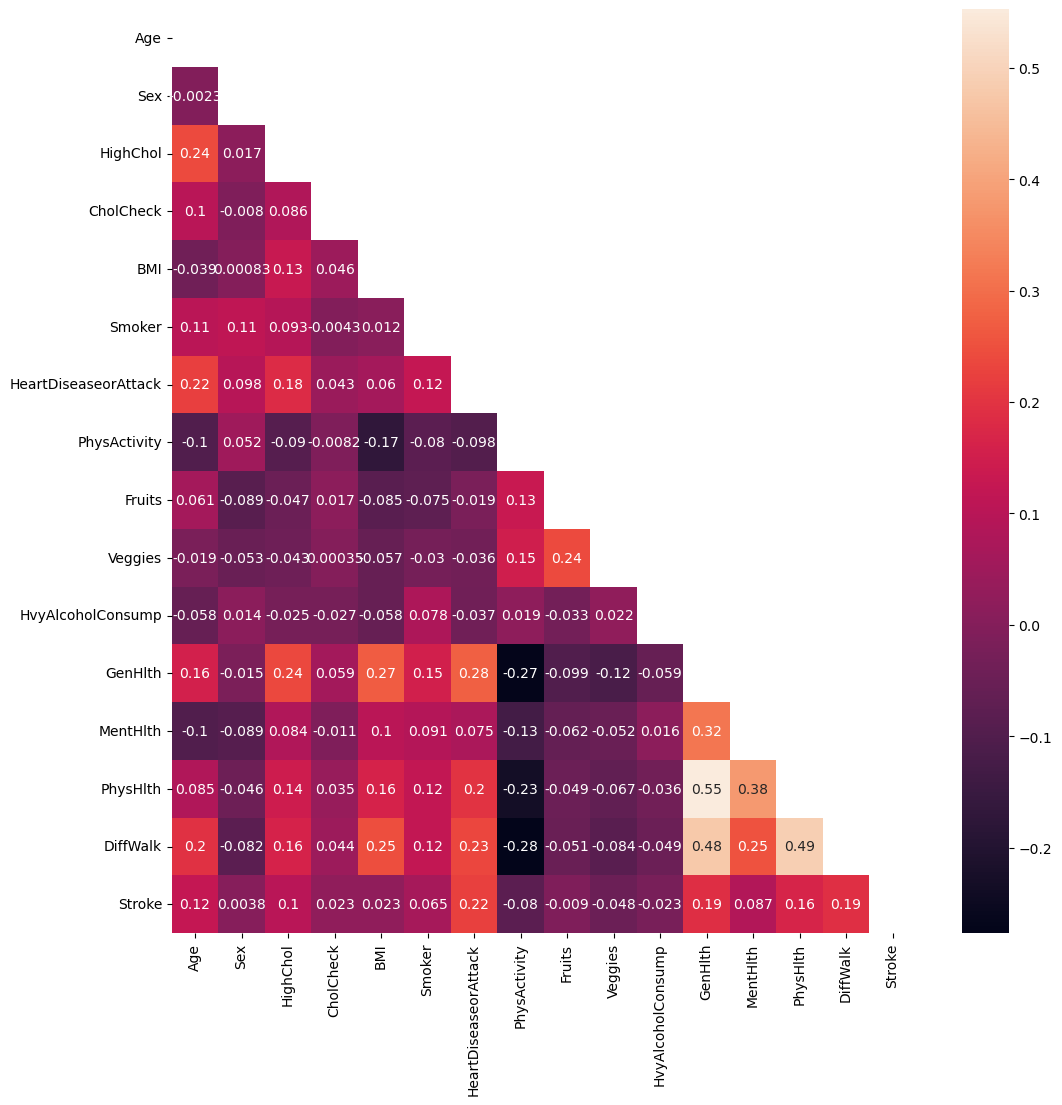

In [9]:
plt.figure(figsize=(12,12))
# only show half the correlation plot for easier reading by creating a mask
mask=np.triu(df.corr())
sns.heatmap(df.corr(),annot=True, mask=mask)
plt.show()

### Modelling

Given all our data is label encoded we will not need to one hot encode data as there are no longer categorical variables. We could attempt to 1 hot encode the variables like gender but as they have been label encoded it makes sense to utilise this approach vs attempting to one hot encode already transformed variables.

In [10]:
# Split data into X & Y
y = df['Stroke']
X = df.drop(columns=['Stroke'])


# Split into test and train at 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1)

# now split into train and validation to give 60/20/20 split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=1)

In [11]:
y.shape

(70692,)

In [12]:
# Trial a Naive Bayes Model

model = CategoricalNB()
model.fit(X, y)
y_pred = model.predict(X_test)
y_pred_probs = model.predict_proba(X_test)

#print(f'ROC score for classification tree: {roc_auc_score(y_test, y_pred_probs)}')
print(f'Accuracy score for classification tree is :{accuracy_score(y_test, y_pred)}')
print(f'Precision Score {precision_score(y_test, y_pred, average="weighted")}')

Accuracy score for classification tree is :0.8835404668081237
Precision Score 0.91121438313923


In [13]:
# Logistic Regression
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X_test)
y_pred_probs = model.predict_proba(X_test)

#print(f'ROC score for classification tree: {roc_auc_score(y_test, y_pred_probs)}')
print(f'Accuracy score for Logistic Regression is :{accuracy_score(y_test, y_pred)}')
print(f'Precision Score {precision_score(y_test, y_pred, average="weighted")}')

Accuracy score for Logistic Regression is :0.9384055774477115
Precision Score 0.9064092187205331


/home/antihaddock/anaconda3/envs/mlbookcamp/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# Decision Tree Classification
model = DecisionTreeClassifier()
model.fit(X, y)
y_pred = model.predict(X_test)
y_pred_probs = model.predict_proba(X_test)

#print(f'ROC score for classification tree: {roc_auc_score(y_test, y_pred_probs)}')
print(f'Accuracy score for Classification Tree is :{accuracy_score(y_test, y_pred)}')
print(f'Precision Score {precision_score(y_test, y_pred, average="weighted")}')

Accuracy score for Classification Tree is :0.9932302717995352
Precision Score 0.9932701275185594


The Decision tree classifcation seems far to good to be true as it is 99% for multiple metrics. There could be an element of overfitting we need to explore.

In [15]:
model.get_depth()

35

Going to a depth of 35 it is clearly overfitting and needs to be pruned.

/home/antihaddock/anaconda3/envs/mlbookcamp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/antihaddock/anaconda3/envs/mlbookcamp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/antihaddock/anaconda3/envs/mlbookcamp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:xlabel='depth', ylabel='accuracy'>

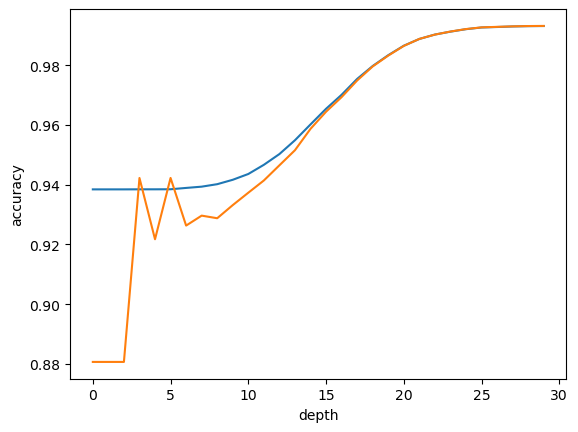

In [34]:
accuracies = []
iteration = []
precisions = []
for i in range(30):
    model = DecisionTreeClassifier(max_depth=i+1)
    model.fit(X, y)
    y_pred = model.predict(X_test)
    y_pred_probs = model.predict_proba(X_test)
    
    accuracies.append(accuracy_score(y_test, y_pred))
    iteration.append(i)
    precisions.append(precision_score(y_test, y_pred, average="weighted"))
    #print(f'ROC score for classification tree: {roc_auc_score(y_test, y_pred_probs)}')
    #print(i)
    #print(f'Accuracy score for Classification Tree is :{accuracy_score(y_test, y_pred)}')
    #print(f'Precision Score {precision_score(y_test, y_pred, average="weighted")}')

values = pd.DataFrame({'depth':iteration, 'accuracy': accuracies, 'precision': precisions })
sns.lineplot(x='depth', y='accuracy', data=values)
sns.lineplot(x='depth', y='precision', data=values)

We can see that at a tree depth of around 18-20 thwre is a clear plateau in terms of accuracy and precision improvements. Therefore we will se the depth at the level of 20.

###  Exploring Feature importance for the model

<AxesSubplot:>

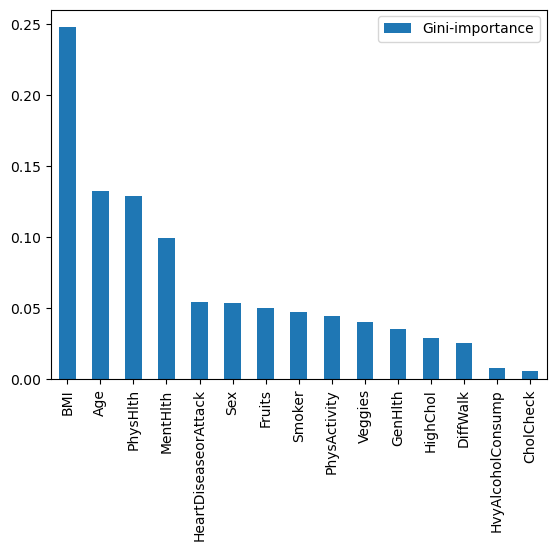

In [43]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending=False).plot(kind='bar')

Explore if reducing the number of features has a neglible effect on the model to reduce chance of overfitting

In [45]:
# Try with only top 5 features
y = df['Stroke']
X = df[['BMI', 'Age','PhysHlth', 'MentHlth',  'HeartDiseaseorAttack']]


# Split into test and train at 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1)

# now split into train and validation to give 60/20/20 split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=1)


model = DecisionTreeClassifier()
model.fit(X, y)
y_pred = model.predict(X_test)
y_pred_probs = model.predict_proba(X_test)

#print(f'ROC score for classification tree: {roc_auc_score(y_test, y_pred_probs)}')
print(f'Accuracy score for Classification Tree is :{accuracy_score(y_test, y_pred)}')
print(f'Precision Score {precision_score(y_test, y_pred, average="weighted")}')

Accuracy score for Classification Tree is :0.9593210063655653
Precision Score 0.9594770071003633


It appears by reducing the model down to its top 5 features we lose precision and accuracy from the model. Therefore the risk of losing model fit is higher then the risk of overfitting and keeping all features will be beneficial.